In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
nl = df.isnull().mean()*100
nl

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [5]:
del_col=[]
for i in range(len(nl)):
    if nl[i]>=30:
        del_col.append(nl.index[i])
del_col    

/tmp/ipykernel_10346/337037644.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nl[i]>=30:


['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [6]:
df.drop(columns=del_col,inplace=True)
df.shape

(142193, 20)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 142192
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Temp9am        112925 non-null  float64
 16  Temp3pm        112925 non-null  float64
 17  RainToday      112925 non-null  ob

In [10]:
df.drop(columns=['Date','Location'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        112925 non-null  float64
 1   MaxTemp        112925 non-null  float64
 2   Rainfall       112925 non-null  float64
 3   WindGustDir    112925 non-null  object 
 4   WindGustSpeed  112925 non-null  float64
 5   WindDir9am     112925 non-null  object 
 6   WindDir3pm     112925 non-null  object 
 7   WindSpeed9am   112925 non-null  float64
 8   WindSpeed3pm   112925 non-null  float64
 9   Humidity9am    112925 non-null  float64
 10  Humidity3pm    112925 non-null  float64
 11  Pressure9am    112925 non-null  float64
 12  Pressure3pm    112925 non-null  float64
 13  Temp9am        112925 non-null  float64
 14  Temp3pm        112925 non-null  float64
 15  RainToday      112925 non-null  object 
 16  RISK_MM        112925 non-null  float64
 17  RainTomorrow   112925 non-null  ob

In [12]:
df['WindGustDir'].value_counts()

WindGustDir
W      8380
SE     8087
E      7835
SSE    7728
S      7728
N      7679
WSW    7629
SW     7575
SSW    7379
ENE    6759
WNW    6742
NW     6404
ESE    6223
NE     6053
NNE    5490
NNW    5234
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        112925 non-null  float64
 1   MaxTemp        112925 non-null  float64
 2   Rainfall       112925 non-null  float64
 3   WindGustDir    112925 non-null  object 
 4   WindGustSpeed  112925 non-null  float64
 5   WindDir9am     112925 non-null  object 
 6   WindDir3pm     112925 non-null  object 
 7   WindSpeed9am   112925 non-null  float64
 8   WindSpeed3pm   112925 non-null  float64
 9   Humidity9am    112925 non-null  float64
 10  Humidity3pm    112925 non-null  float64
 11  Pressure9am    112925 non-null  float64
 12  Pressure3pm    112925 non-null  float64
 13  Temp9am        112925 non-null  float64
 14  Temp3pm        112925 non-null  float64
 15  RainToday      112925 non-null  object 
 16  RISK_MM        112925 non-null  float64
 17  RainTomorrow   112925 non-null  ob

In [14]:
df.drop(columns=['RISK_MM'],inplace=True)

In [15]:
num_col=[]
obj_col=[]
for i in df.columns:
    if df[i].dtype == "object":
      obj_col.append(i)
    else:
      num_col.append(i)  
obj_col      

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

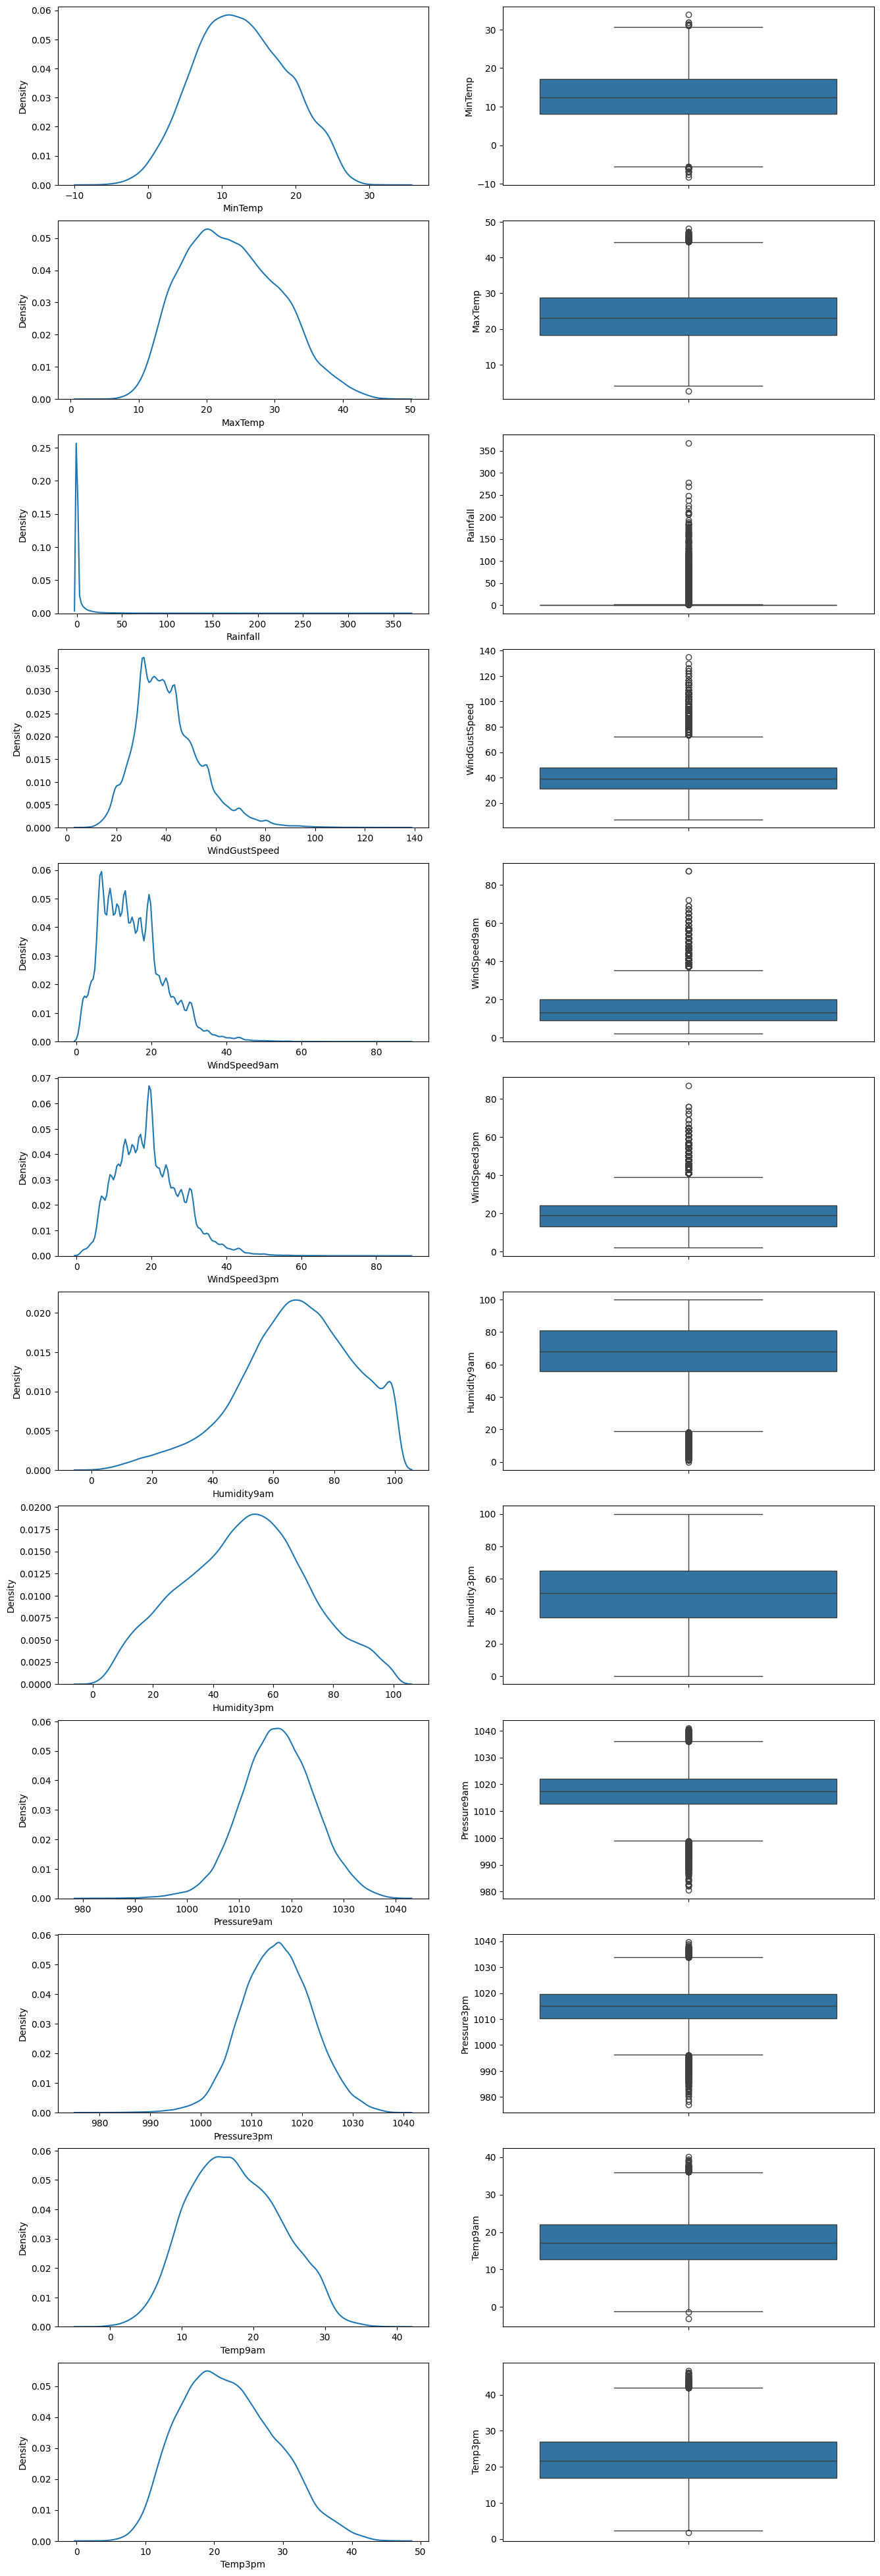

In [21]:
n = len(num_col)
fig,axes = plt.subplots(n,2,figsize=(16,50))
j = 0
for i in num_col:
    sns.kdeplot(df[i],ax = axes[j,0])
    sns.boxplot(df[i],ax = axes[j,1])
    j=j+1

In [25]:
new_df=df
normal = ['Temp3pm','Temp9am','Pressure3pm','Pressure9am','Humidity3pm','MaxTemp','MinTemp']
for i in normal:
    mean = new_df[i].mean()
    std= new_df[i].std()
    up= mean+2*std
    lo=mean-2*std
    new_df = new_df[(new_df[i] < up) & (new_df[i]>lo)]
new_df    

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


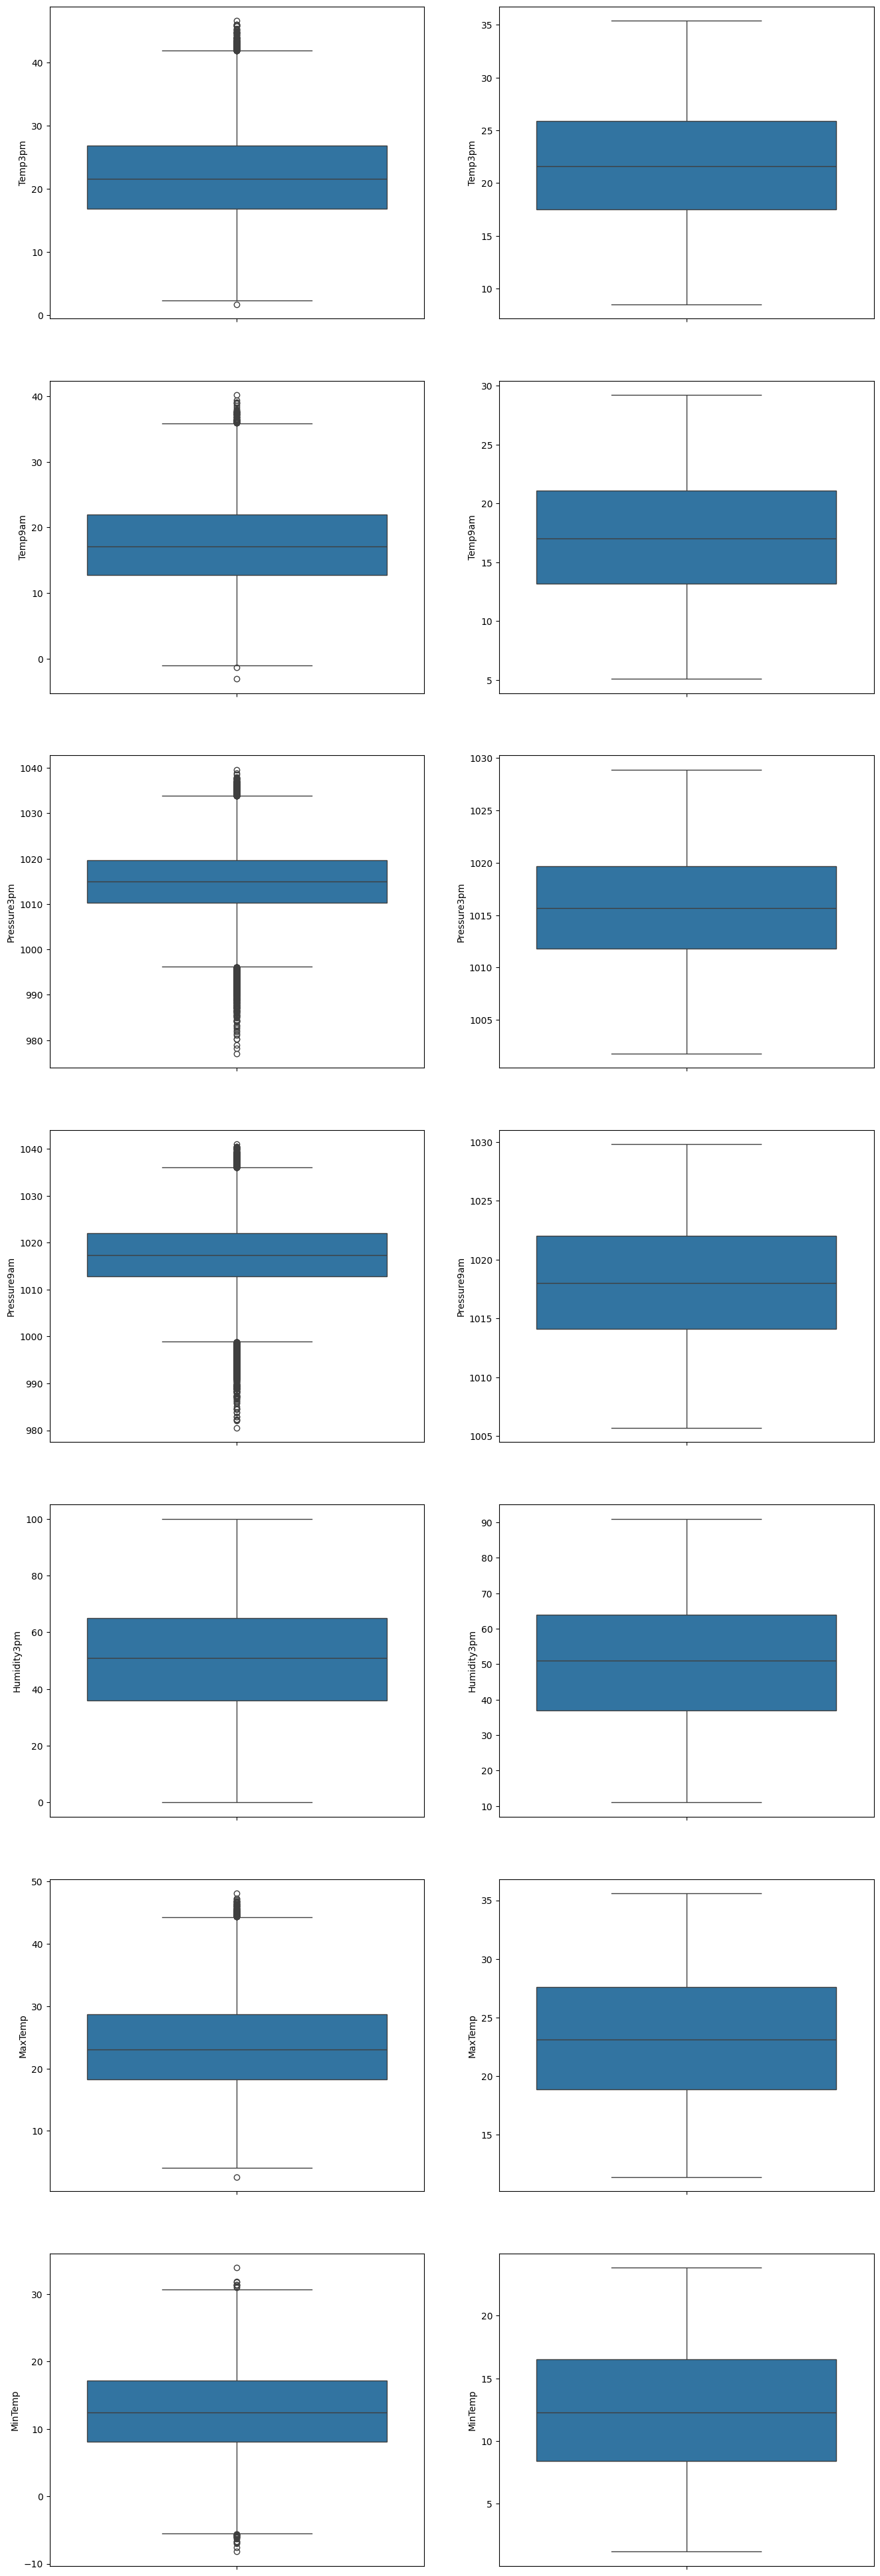

In [26]:
n = len(normal)
fig,axes = plt.subplots(n,2,figsize=(16,50))
j = 0
for i in normal:
    sns.boxplot(df[i],ax = axes[j,0])
    sns.boxplot(new_df[i],ax = axes[j,1])
    j=j+1

In [27]:
new_df.shape

(87441, 17)

In [29]:
num_col,normal

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Temp9am',
  'Temp3pm'],
 ['Temp3pm',
  'Temp9am',
  'Pressure3pm',
  'Pressure9am',
  'Humidity3pm',
  'MaxTemp',
  'MinTemp'])

In [30]:
not_normal = list(set(num_col)-set(normal))
not_normal

['WindSpeed9am', 'Rainfall', 'WindSpeed3pm', 'WindGustSpeed', 'Humidity9am']

In [32]:
for i in not_normal:
    p_75 = new_df[i].quantile(0.75)
    p_25 = new_df[i].quantile(0.25)
    iqr = p_75 - p_25
    upper = p_75 + 1.5*iqr
    lower = p_25 - 1.5*iqr
    new_df = new_df[(new_df[i] < upper) & (new_df[i]>lower)]

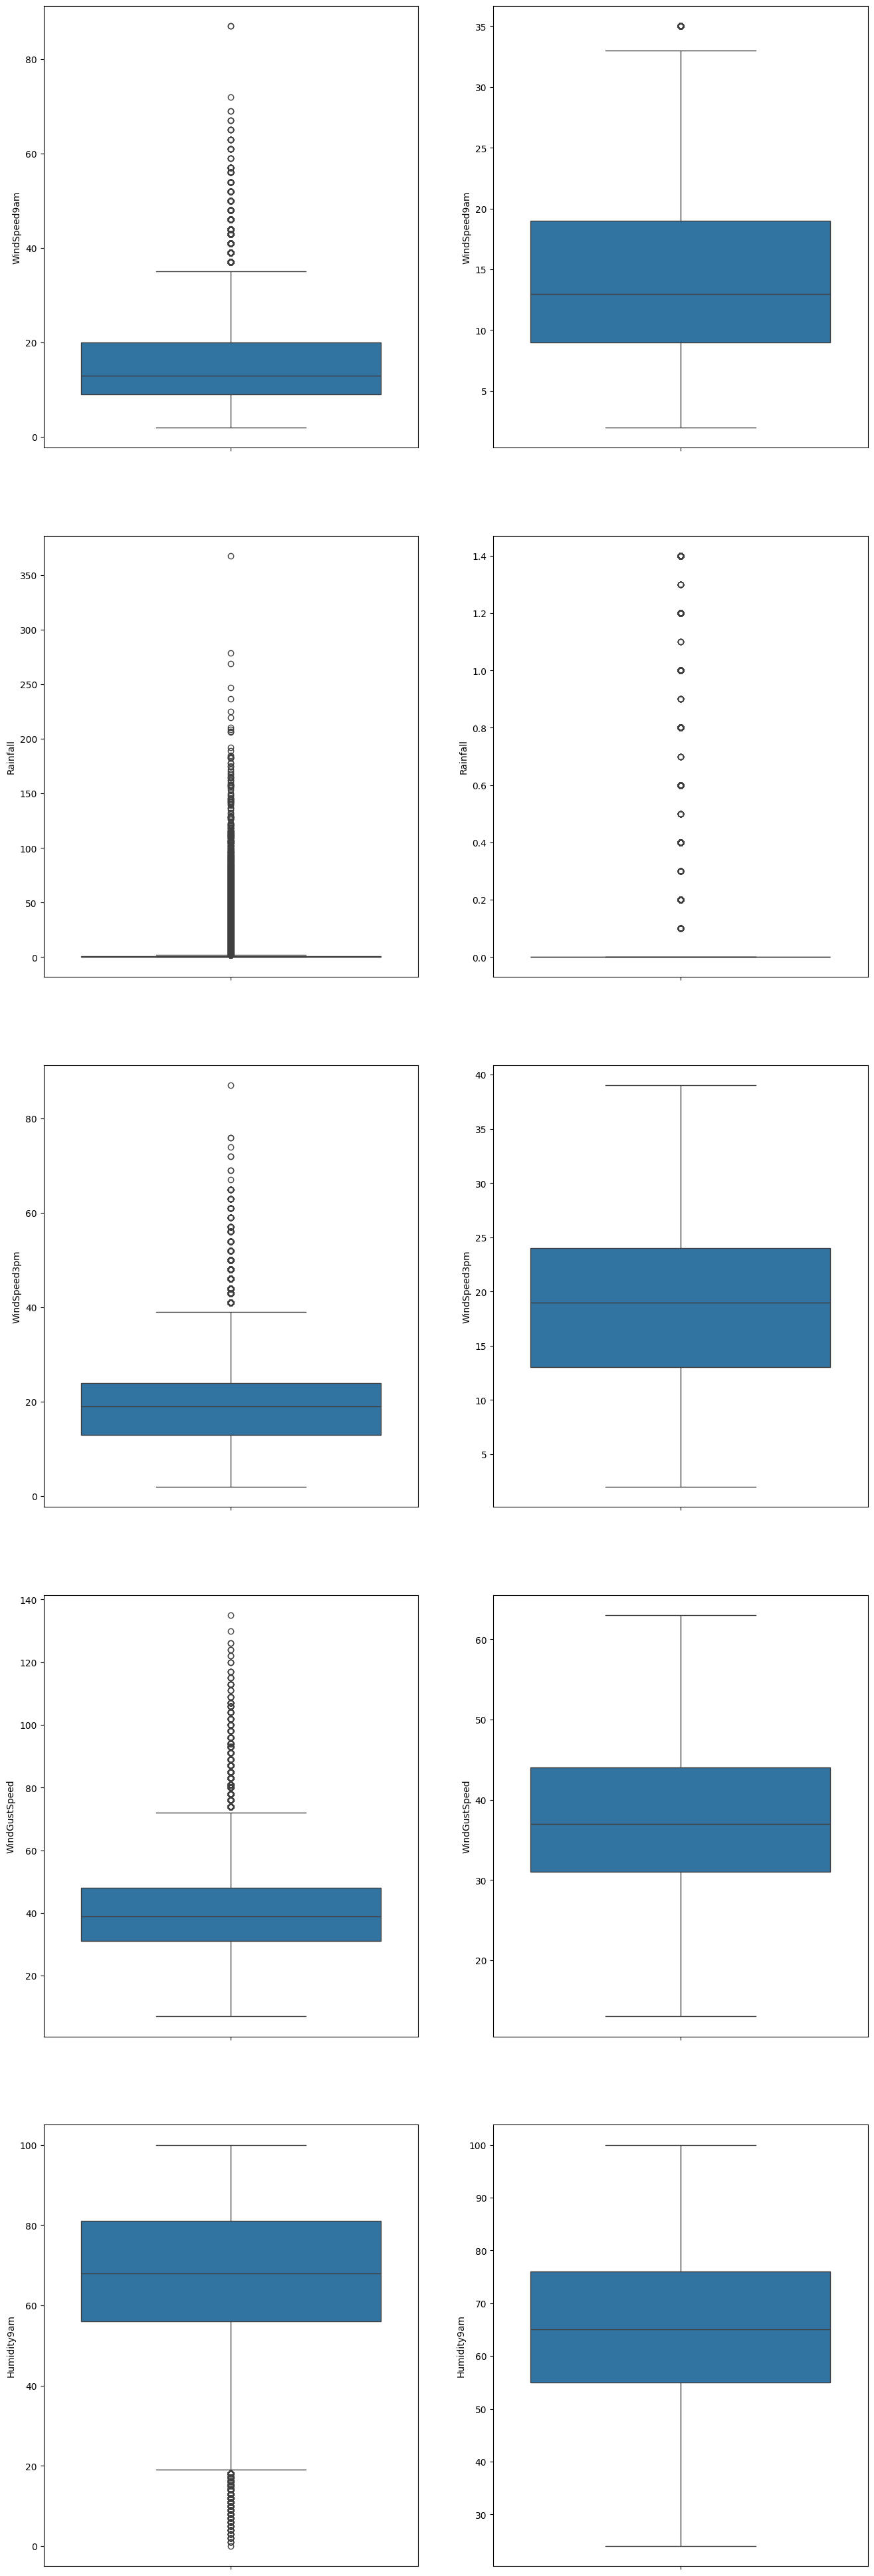

In [33]:
n = len(not_normal)
fig,axes = plt.subplots(n,2,figsize=(16,50))
j = 0
for i in not_normal:
    sns.boxplot(df[i],ax = axes[j,0])
    sns.boxplot(new_df[i],ax = axes[j,1])
    j=j+1

In [34]:
new_df.shape

(66867, 17)

In [35]:
new_df[num_col]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


In [47]:
new_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [49]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
new_df['RainTomorrow'] = le.fit_transform(new_df['RainTomorrow']) 
new_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0
142189,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0
142190,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0
142191,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,0


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
trf = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False),['WindGustDir','WindDir9am','WindDir3pm','RainToday']),
    ('tnf2',StandardScaler(),num_col)
],remainder='passthrough')

In [50]:
new_df1 = trf.fit_transform(new_df)
new_df1

array([[ 0.        ,  0.        ,  0.        , ..., -0.09245698,
        -0.1155961 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.03422567,
         0.34862975,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.70337086,
         0.14437037,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.25708308,
         0.38576782,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.94651612,
         0.68287236,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.44184481,
         0.66430333,  0.        ]])

In [51]:
new_df1 = pd.DataFrame(new_df1)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66867 entries, 0 to 66866
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       66867 non-null  float64
 1   1       66867 non-null  float64
 2   2       66867 non-null  float64
 3   3       66867 non-null  float64
 4   4       66867 non-null  float64
 5   5       66867 non-null  float64
 6   6       66867 non-null  float64
 7   7       66867 non-null  float64
 8   8       66867 non-null  float64
 9   9       66867 non-null  float64
 10  10      66867 non-null  float64
 11  11      66867 non-null  float64
 12  12      66867 non-null  float64
 13  13      66867 non-null  float64
 14  14      66867 non-null  float64
 15  15      66867 non-null  float64
 16  16      66867 non-null  float64
 17  17      66867 non-null  float64
 18  18      66867 non-null  float64
 19  19      66867 non-null  float64
 20  20      66867 non-null  float64
 21  21      66867 non-null  float64
 22

In [54]:
new_df1

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625764,0.822569,0.734556,0.354471,-1.477082,-2.089015,-1.702535,-0.092457,-0.115596,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625764,-1.405818,0.466065,-1.363959,-1.304743,-1.534251,-1.568853,-0.034226,0.348630,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.828077,0.683295,1.003047,-1.745832,-1.017511,-2.108145,-1.396977,0.703371,0.144370,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.397365,-0.430899,-1.279124,-1.300313,-1.821761,-0.195166,-0.613985,0.140468,0.757149,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.322295,-0.987996,0.197575,1.054573,-0.845172,-1.495992,-1.912606,0.082237,1.351358,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.689270,0.126198,-0.742143,-0.409275,-1.189851,1.163049,0.990194,-1.548240,-0.282717,0.0
66863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.689270,-0.152350,-1.010634,-0.918440,-1.362190,1.143919,0.818318,-1.412367,-0.004182,0.0
66864,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.599678,-0.152350,-1.279124,-0.600212,-1.534529,0.933491,0.589149,-1.257083,0.385768,0.0
66865,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.082331,-0.709447,-1.279124,-0.791149,-1.362190,0.455247,0.149910,-0.946516,0.682872,0.0


In [55]:
X = new_df1.iloc[:,:62]
y = new_df1.iloc[:,62]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8790937640197398
